In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils

In [2]:
myPic = np.zeros(shape = (100, 100))


# for row in range(len(myPic)):
#     for col in range(len(myPic[0])):
#         if(row % 30 == 0):
#             myPic[row, col] = 50
#             myPic[row, col] = 50
#             myPic[row, col] = 50

color = 0
for col in range(len(myPic)):
    color = color + 4
    for row in range(len(myPic[0])):
#         if(row % 3 == 0):
        myPic[row, col] = color

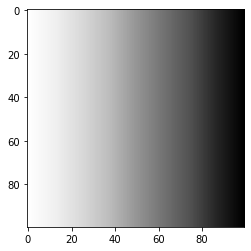

In [3]:
plt.imshow(myPic, cmap="Greys")

In [4]:
def getAngle1(ref):    
    result = []

    a = ref[0,0]
    b = ref[0,1]
    c = ref[1,0]
    d = ref[1,1]
    
    Hor = abs(a - b) + abs(c - d)
    Vert = abs(a - c) +  abs(b - d)    
    
    return np.arctan(Hor/(Vert))

In [5]:
def getAngle2(ref):    
    result = []

    a = ref[0,0]
    b = ref[0,1]
    c = ref[1,0]
    d = ref[1,1]
    
    Hor = abs(a - b) + abs(c - d)
    Vert = abs(a - c) +  abs(b - d)    
    
    return np.arctan(Vert/(Hor))

In [6]:
def getImageAngles1(image):
    
    result = {}
    
    for row in range(len(image)-1):
        for col in range(len(image[0])-1):
            a = image[row, col]
            b = image[row, col + 1]
            c = image[row + 1, col]
            d = image[row + 1, col + 1]

            currElement = np.array([a, b, c, d]).reshape(2, 2)

            currAngle = getAngle1(currElement)
            
            if(currAngle >= 0):
                result[(row, col)] = currAngle
    
    return result 

In [7]:
def getImageAngles2(image):
    
    result = {}
    
    for row in range(len(image)-1):
        for col in range(len(image[0])-1):
            a = image[row, col]
            b = image[row, col + 1]
            c = image[row + 1, col]
            d = image[row + 1, col + 1]

            currElement = np.array([a, b, c, d]).reshape(2, 2)

            currAngle = getAngle2(currElement)
            
            if(currAngle >= 0):
                result[(row, col)] = currAngle
    
    return result 

In [8]:
# def getImageAngles(image):
    
#     result = image
    
#     for row in range(len(image)-1):
#         for col in range(len(image[0])-1):
#             a = image[row, col]
#             b = image[row, col + 1]
#             c = image[row + 1, col]
#             d = image[row + 1, col + 1]

#             currElement = np.array([a, b, c, d]).reshape(2, 2)

#             currAngle = getAngle(currElement)
            
#             if(currAngle < 0):
#                 result[row, col] = -1
                
#             result[row, col] = currAngle
                
    
#     return result

In [9]:
def getSurrounding(centerItem, ItemList):
    result = []
    a = centerItem[0]
    b = centerItem[1]
        
    for item in ItemList:
        if(item != centerItem):
            if(abs(item[0] - 1) <= 1 and abs(item[1] - b) <= 1):
                result.append(item)
                
    return result

In [10]:
def stripImageAngles(imageAngles, center):
    result = []
    
    rowStart = center[0]-1
    rowEnd = center[0] + 2
    
    colStart = center[1] -1
    colEnd = center[1] + 2
    
    
    for row in range(rowStart, rowEnd):
        for col in range(colStart, colEnd):
            result.append(imageAngles[(row, col)])

    
    return result

In [11]:
myOtherPic = myPic[5:45, 5:45]
np.shape(myOtherPic)

(40, 40)

In [12]:
# getSurrounding((2, 2), list(getImageAngles1(myPic)))

In [13]:
rotatedImg = imutils.rotate(myPic, angle=20)

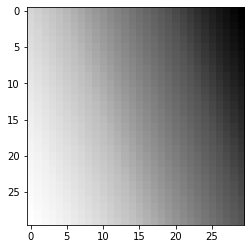

In [15]:
rotatedImg = rotatedImg[30:60, 30:60]
plt.imshow(rotatedImg, cmap="Greys")

<ipython-input-4-d82f65a74558>:12: RuntimeWarning: divide by zero encountered in double_scalars
  return np.arctan(Hor/(Vert))


Text(0.5, 0, 'Rotated Angle')

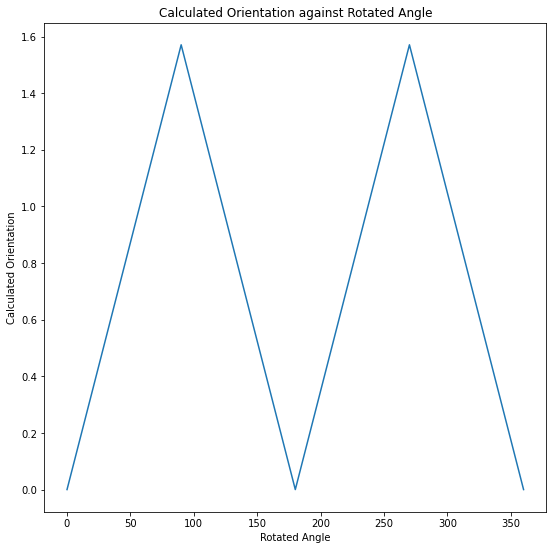

In [23]:
myDF1 = {}
myDF1['rotatedAngle'] = []
myDF1['computedAngle'] = []

myDF2 = {}
myDF2['rotatedAngle'] = []
myDF2['computedAngle'] = []

myDF3 = {}
myDF3["Expected"] = []


granularity = 1
angle = 360
for i in range((angle*granularity) + 1):
    rotatedImage = imutils.rotate(myPic, angle=i/granularity)
    rotatedImage = rotatedImage[30:60, 30:60]
    
    result1 = getImageAngles1(rotatedImage)
    result1 = np.mean([result1[i] for i in result1])
    expectedResult1 = (angle - i)/(angle * granularity)
    impliedAngle1 = result1 * 90
    result12 = result1

    myDF1['rotatedAngle'].append(i)
    myDF1['computedAngle'].append(result12)

    
    result2 = getImageAngles2(rotatedImage)
    result2 = np.mean([result2[i] for i in result2])
    impliedAngle2 = 90 - impliedAngle1
    expectedResult2AsImpliedbyResult1 = impliedAngle2/90
    expectedResult2 = i/(angle * granularity)
    result22 = result2

    myDF2['rotatedAngle'].append(i)
    myDF2['computedAngle'].append(result22) 
    
    myDF3["Expected"].append(expectedResult2AsImpliedbyResult1 - expectedResult2)
    
    
    
#     print(i, "   ", result)

myDF1 = pd.DataFrame(myDF1)
myDF2 = pd.DataFrame(myDF2)

plt.figure(figsize = (9, 9))
# plt.plot(myDF1['rotatedAngle'], myDF1['computedAngle'])
plt.plot(myDF2['rotatedAngle'], myDF2['computedAngle'])
# plt.plot(myDF2['rotatedAngle'], myDF3['Expected'])
plt.title("Calculated Orientation against Rotated Angle")
plt.ylabel("Calculated Orientation")
plt.xlabel("Rotated Angle")

In [18]:
myDict = {1: 10, 2:45}
[myDict[i] for i in myDict]

[10, 45]